------
------
# SISTEMAS DE CONTROL II - FCEFyN - UNC - 2025
## Alumno: Ferraris Domingo
----
----

## Caso de estudio 1. Sistema de dos variables de estado
-----

### Resultados

#### Item 1:
Se obtuvo el modelo en espacio de estados partiendo de las ecuaciones del sistema, ademas se calcularos **parametros de simulacion adecuados** segun la dinamica del mismo.  
> * t_step  = 6.7726e-03  
> * t_max   = 0.013617  

Se pudo simular exitosamente para los parametros requeridos y se creo un framework de simulacion y graficas que se reutilizaran para posteriores items

#### Item 2:
Se aprendio a aplicar el metodo de Chen y la **importancia en la eleccion de los puntos** sobre la respuesta que se quiere estimar  
Se simularon extosamente las funciones de transferencia estimadas, tanto para cero-polos como para solo-polos  
Se logro estimar los parametros RLC para las mediciones dadas:  
> * R = 220.00
> * C = 2.2032e-06
> * L = 6.6224e-04

#### Item 3:
Se utilizaron las mediciones de corriente para **verificar los parametros RLC estimados** exitosamente, si bien se detectaron algunas diferencias en los ultimos puntos de tiempo, se consideraron aceptables para esta aplicacion

-----

#

### Detalles

#### Item 1:
Con las ecuaciones del modelo primero identificaron las entradas/salidas de interes y asignaron las variables de estado  
Luego se plantearon las ecuaciones de estados y salida, y mediante Octave se obtuvieron las **matrices del modelo:**

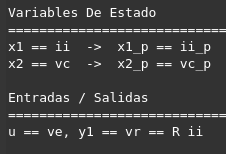 

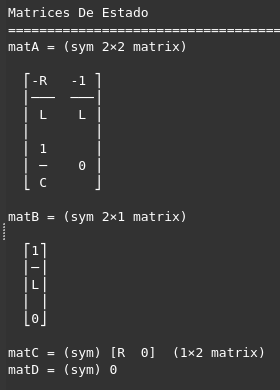

Seguidamente se valuaron los parametros RLC con los valores requeridos, obteniendo el modelo numerico en espacio de estados  
Utilizando la informacion del modelo, se obtuvieron los **parametros de simulacion adecuados:**

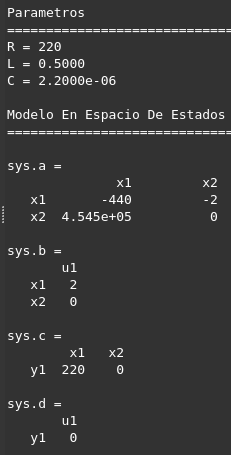

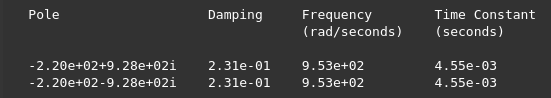

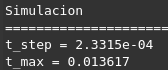

Finalmente se simulo el modelo exitosamente:

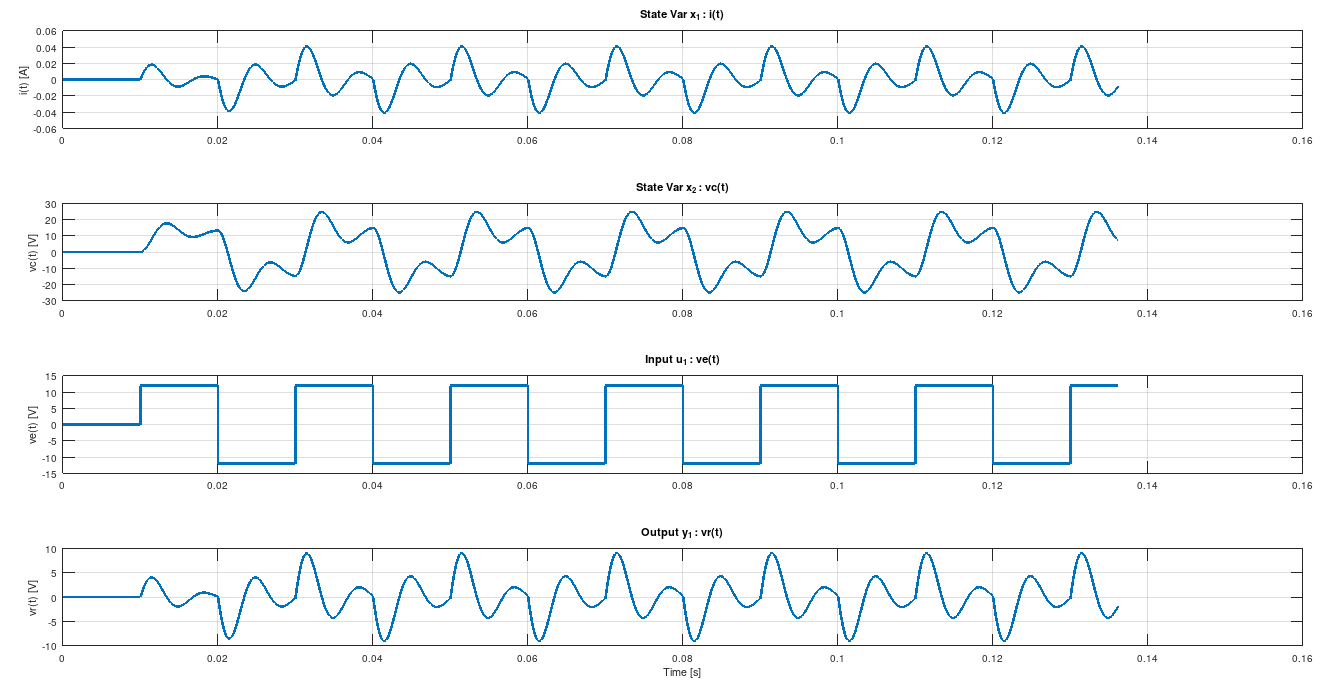

#### Item 2:

De las graficas de las mediciones se identificaron los parametros y **puntos de muestreo** para aplicar el metodo de Chen  
Se tuvo en cuenta que la respuesta comienza a los 10ms y se tomo un t1 100us despues de ese punto:

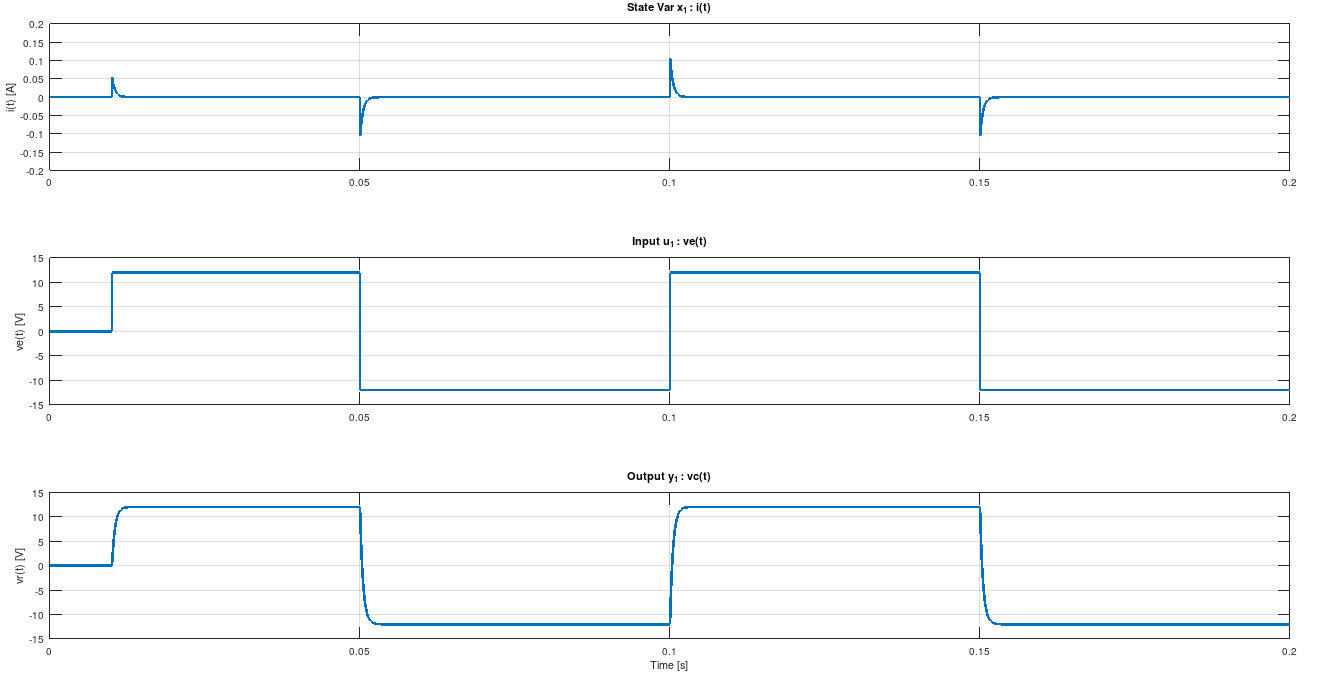

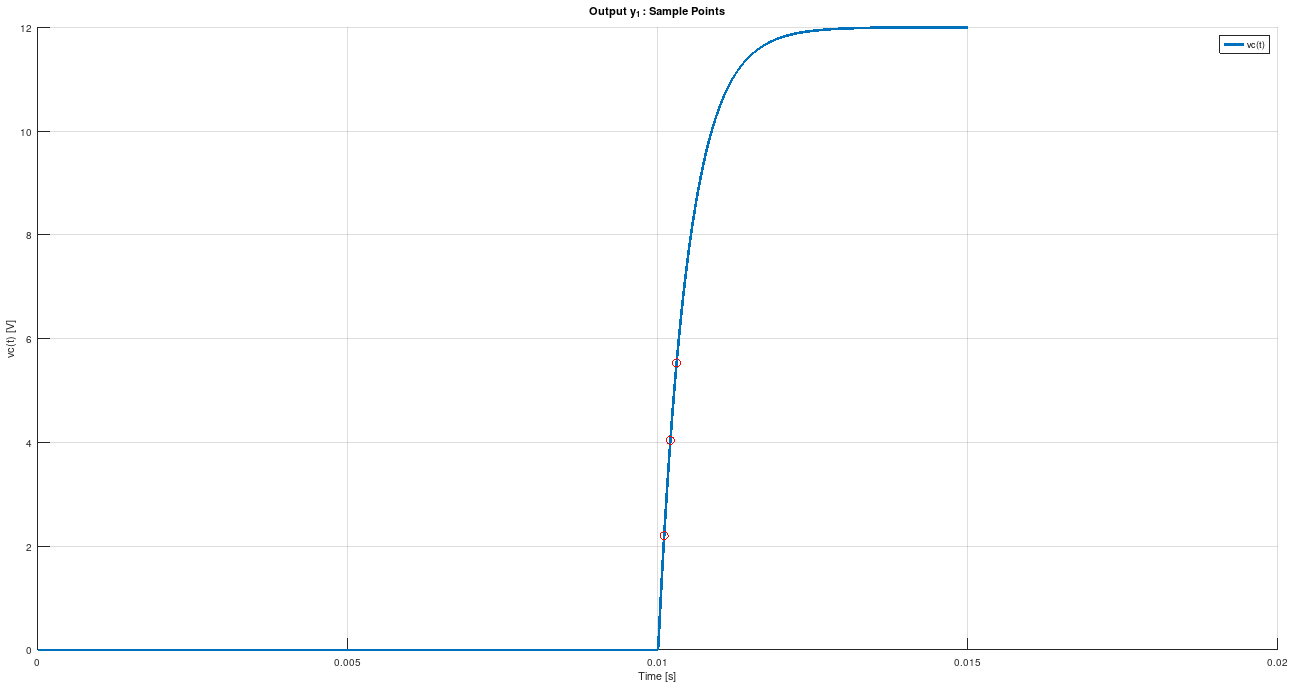

Gracias al metodo se obtuvieron las constantes de tiempo estimadas y se plantearon las funciones de transferencia en forma de cero-polos y solo-polos para comparacion:

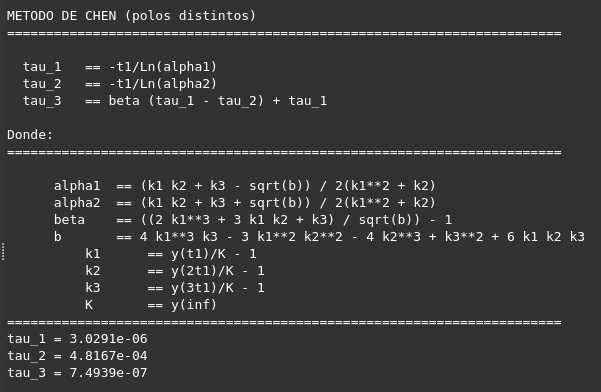

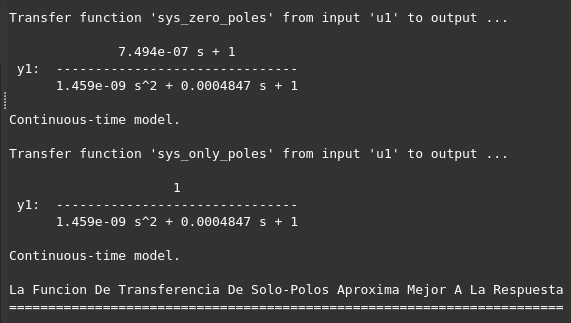

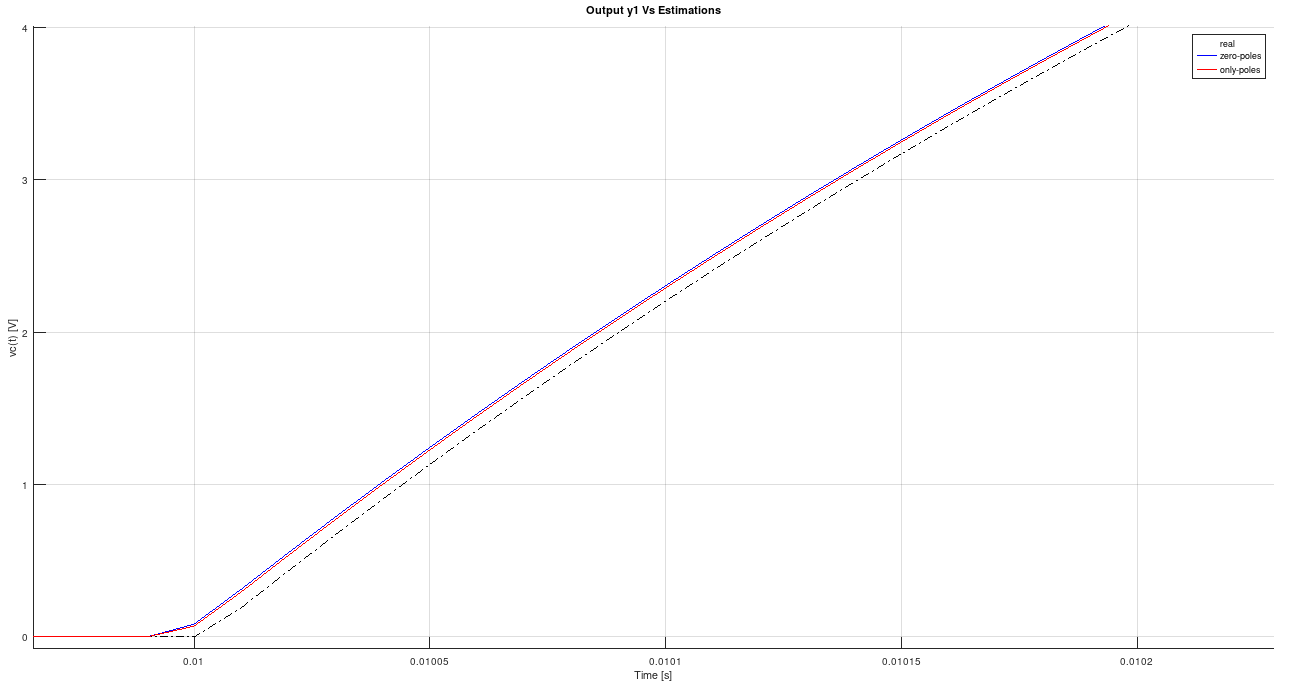

Para relacionar los parametros RLC con las constantes de tiempo estimadas, se obtuvo mediante Octave la funcion de transferencia en forma simbolica del sistema dado  
Finalmente **por igualacion** se obtuvieron los parametros requeridos:

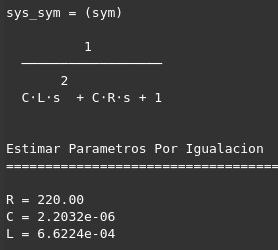

#### Item 3:

Finalmente con los parametros RLC estimados se obtuvo el modelo (estimado) en espacio de estados y utilizo la medicion de **corriente en t > 50ms para comparar** con el modelo  
Para 150ms se detectaron las maximas diferencia pero se consideraron aceptables para la aplicacion:

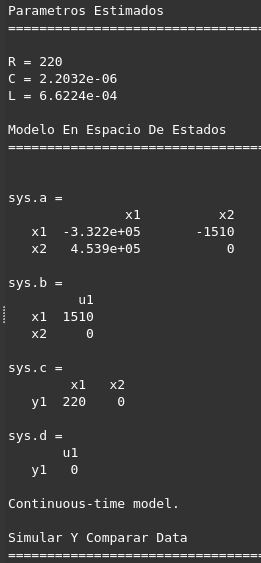

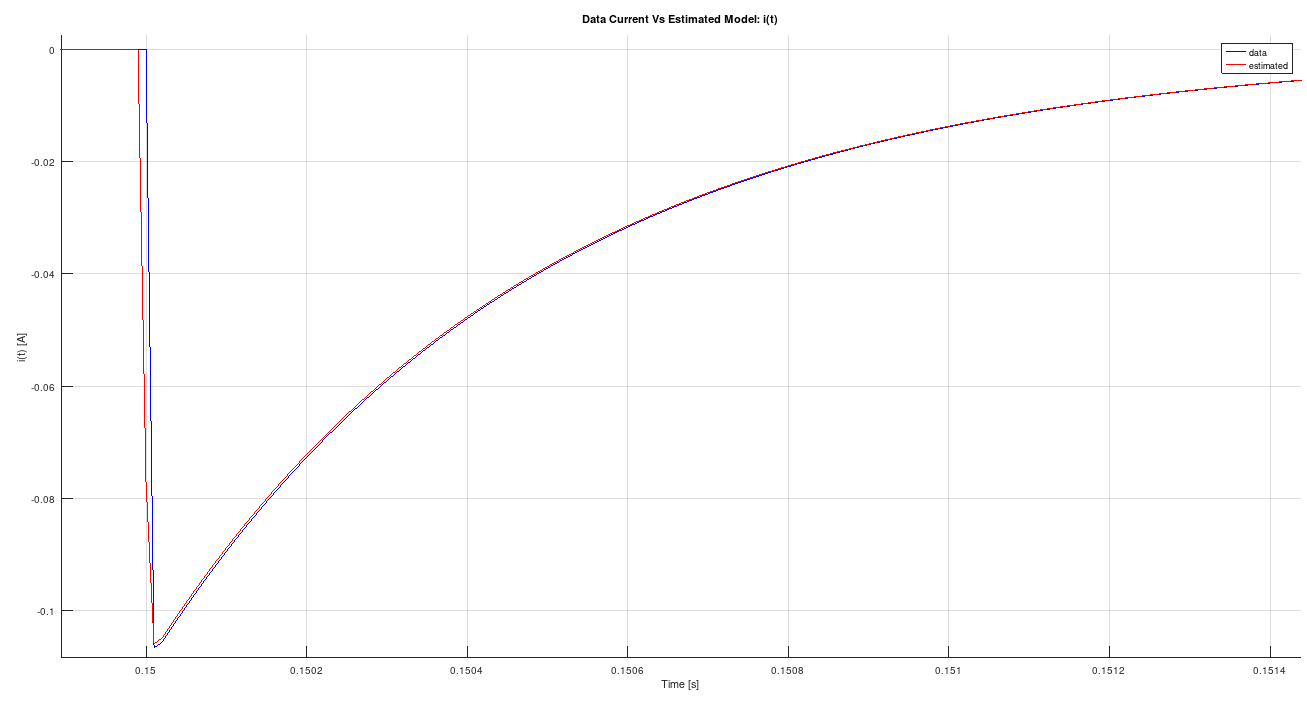

--------


#

## Caso de estudio 2. Sistema de tres variables de estado
-----

### Resultados

#### Item 4:
Se obtuvo el modelo en espacio de estados partiendo de las ecuaciones del sistema, ademas se definieron los parametros de simulacion adecuados segun la dinamica del mismo.  
Para obtener torque/corriente maximos se barrio con una rampa u2 y se encontro el **punto donde la velocidad es cero:**  
> * tl_max = 1.5357e-03
> * ia_max = 0.2158

#### Item 5:
Se aplico exitosamente el metodo de Chen para **estimar las constantes dinamica del sistema** en base a las mediciones dadas    
Se eligio modelar a TL como una **atenuacion k1 a la salida omega**  
Se obtuvieron los parametros dinamicos:  
> * Ganancia Omega/Va: k0 = 3.8093
> * Ganancia Omega/TL: k1 = -34.500  
> * tau_1 = 2.2687e-03
> * tau_2 = 0.092176

#### Item 6:
Usando los parametros estimados proporcionados, se calcularos el tiempo se simulacion y resolucion adecuados para el sistema  
Se implemento el algoritmo **PID en tiempo discreto** y se lo aplico al sistema exitosamente  
Mediante prueba y error se encontro una configuracion para el PID con la cual **el sistema se comporta de manera deseada:**  
> * kp  = 17
> * kp  = 100
> * kd  = 0.8

-----


#

### Detalles

#### Item 4:
Con las ecuaciones del modelo primero se identificaron las entradas/salidas de interes y asignaron las variables de estado  
Luego se plantearon las ecuaciones de estados y salida, y mediante Octave se obtuvieron las matrices del modelo donde **se definio como salida a la posicion angular:**  

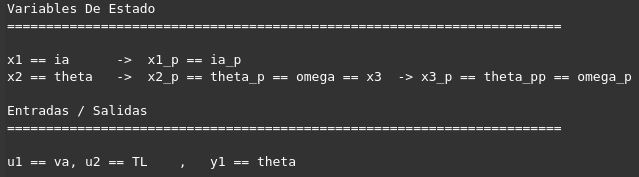

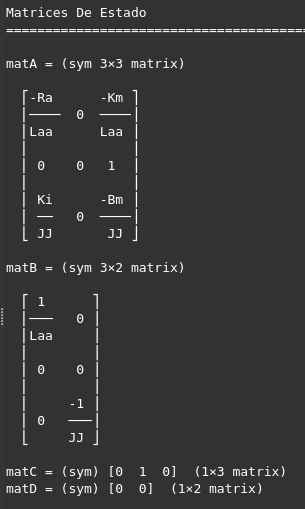

Seguidamente se valuaron los parametros del motor con los valores dados, obteniendo el modelo numerico en espacio de estados  
La resolucion requerida para el eje de tiempo es de 10E-7s pero para este sistema una simulacion de 5s resulto en un **tiempo de simulacion excesivo**, por tanto para agilizar las simulaciones se utilizo la resolucion sugerida y se calculo un tiempo de simulacion mas adecuado  
Con esto se simulo el modelo exitosamente para un va = 12V y TL = 1mNm:  

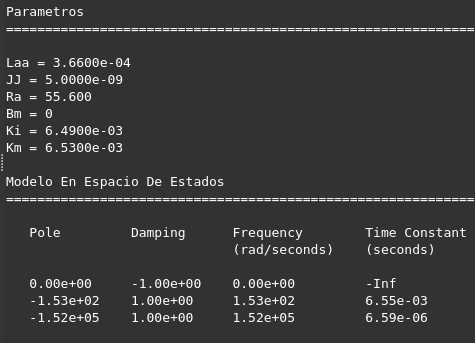

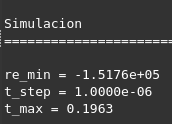

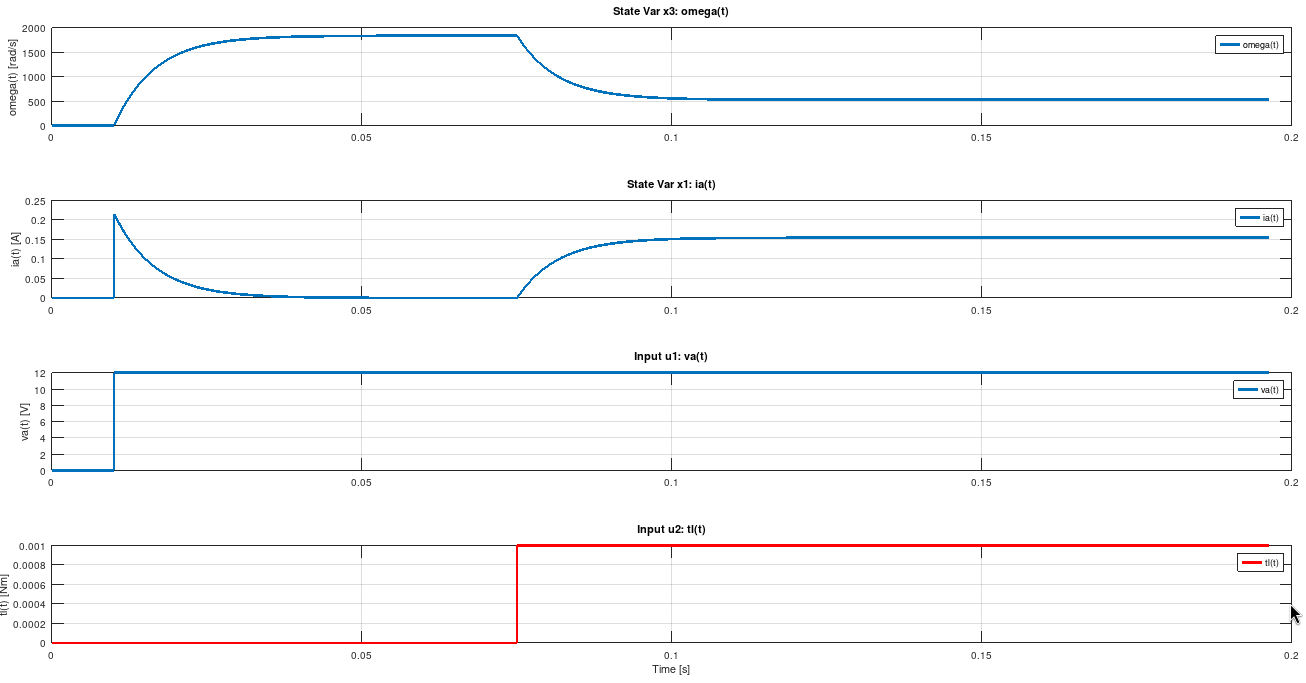

#### Item 5:

Se comenzo estimando la dinamica para omega/Va, para ello de las graficas se identificaron los parametros y puntos de tiempo de muestreo para aplicar el metodo de Chen  
Se tuvo en cuenta que la respuesta comienza a los 101ms y se tomo un t1 9ms despues de ese punto:

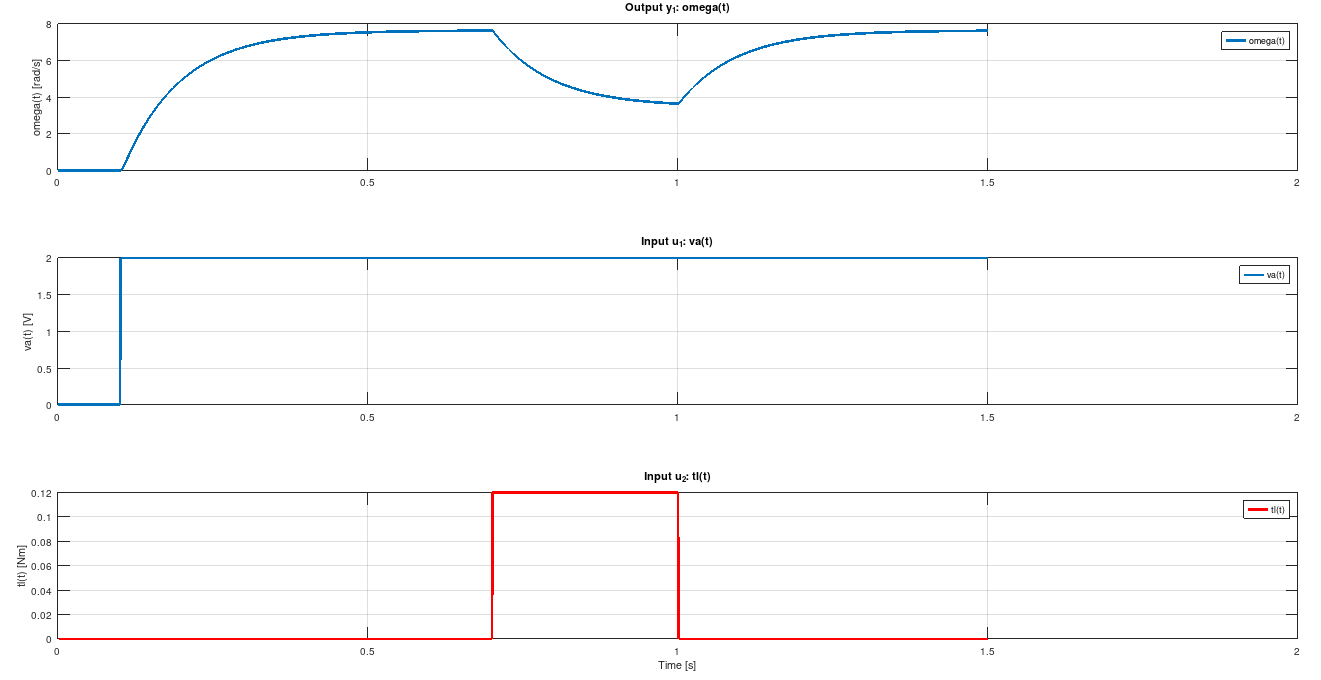

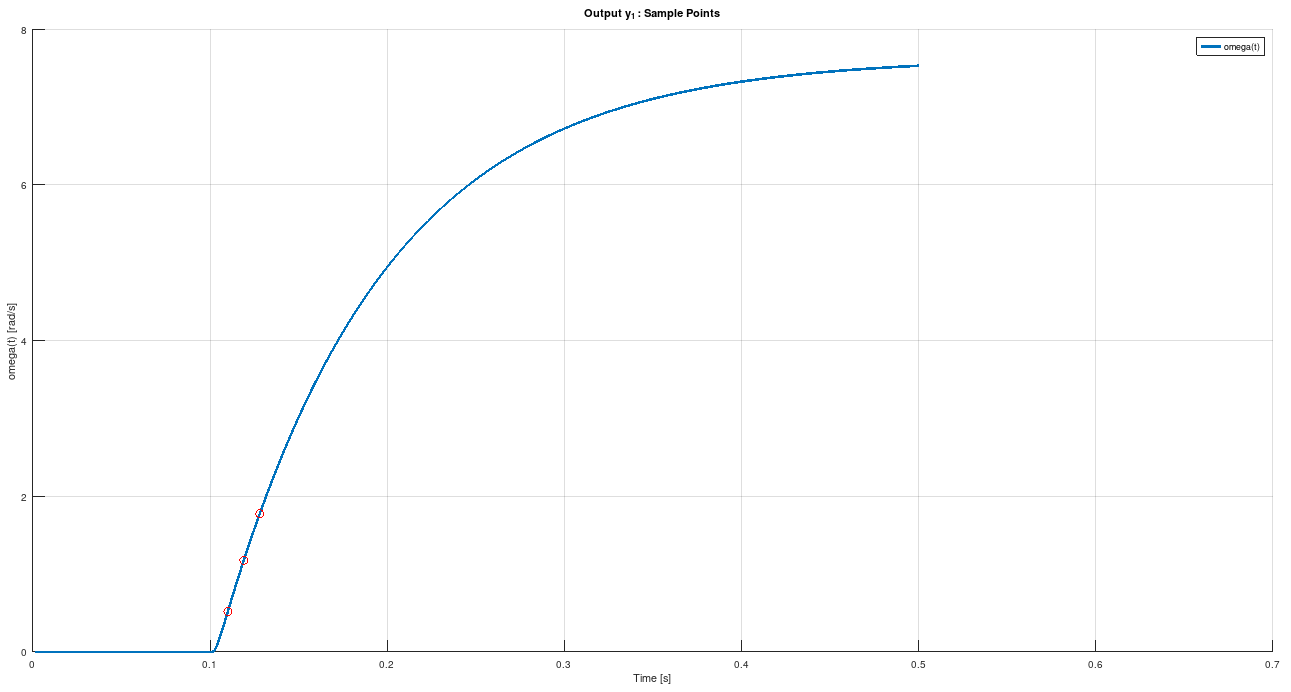

Gracias al metodo **se obtuvieron las constantes de tiempo estimadas** para la respuesta de omega/Va:  

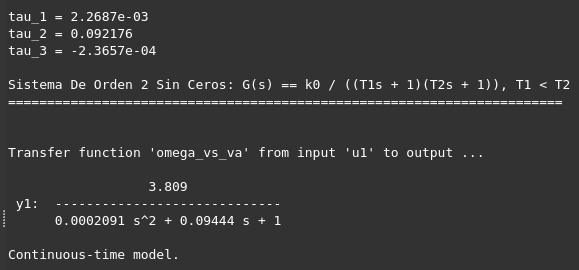

Para la dinamica de omega/TL se decidio **modelarla como una simple ganancia** con la misma ecuacion caracteristica  
Para esto se busco la relacion entre variacion de omega y el TL aplicado  
Se obtuvo un primer valor teorico pero este no ajustaba bien a la respuesta, por tanto se hizo un rapido **barrido simulando para distintas atenuaciones** y se eligio la que mejor ajusta:  

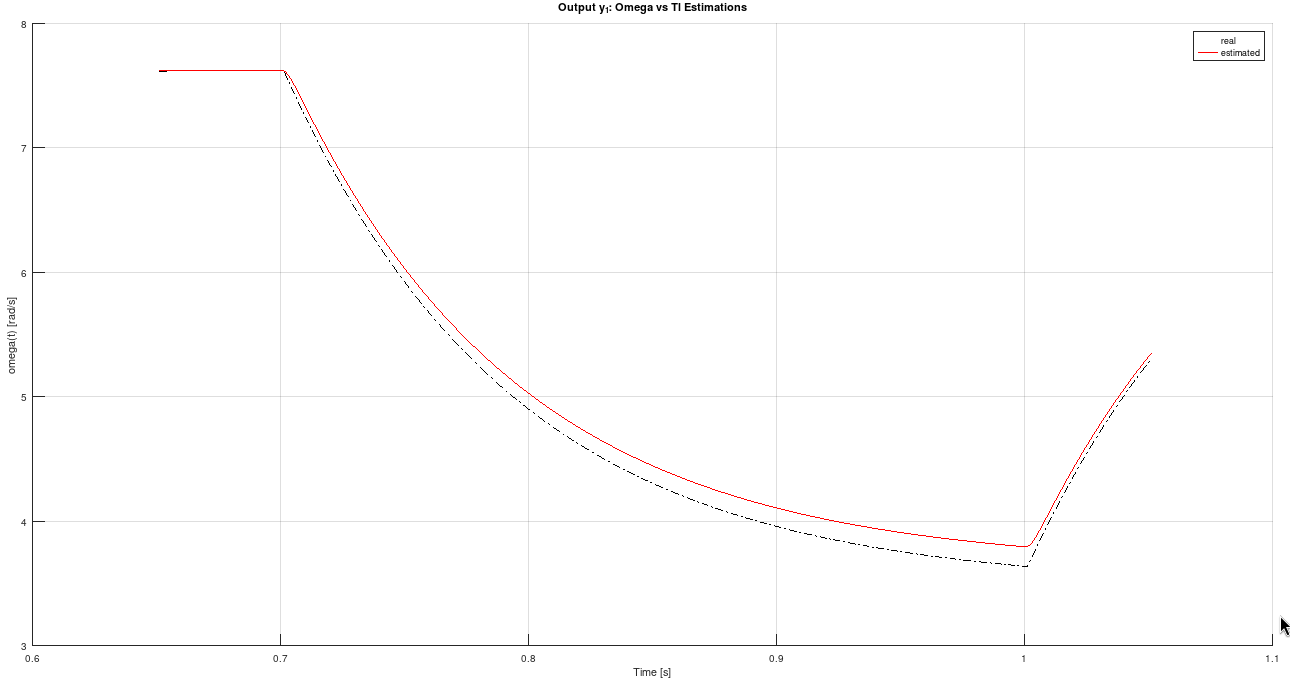

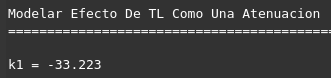

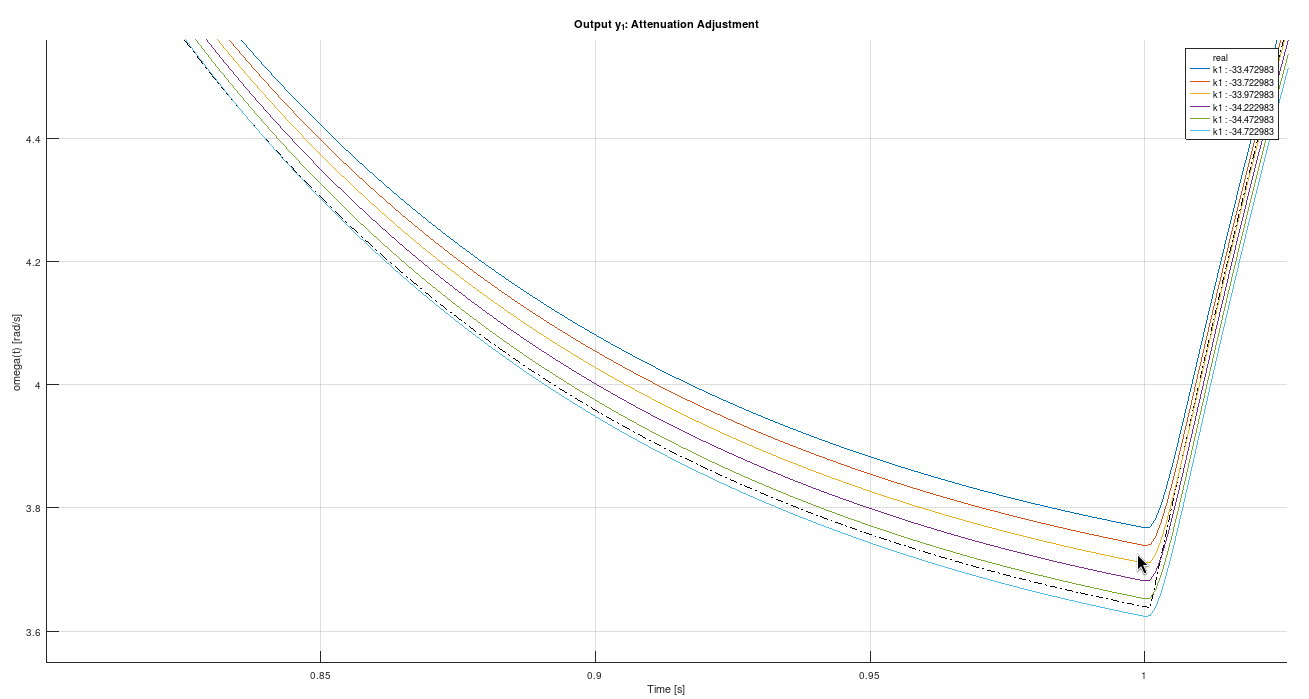

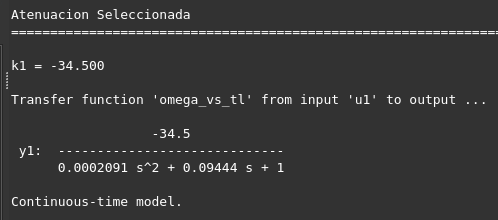

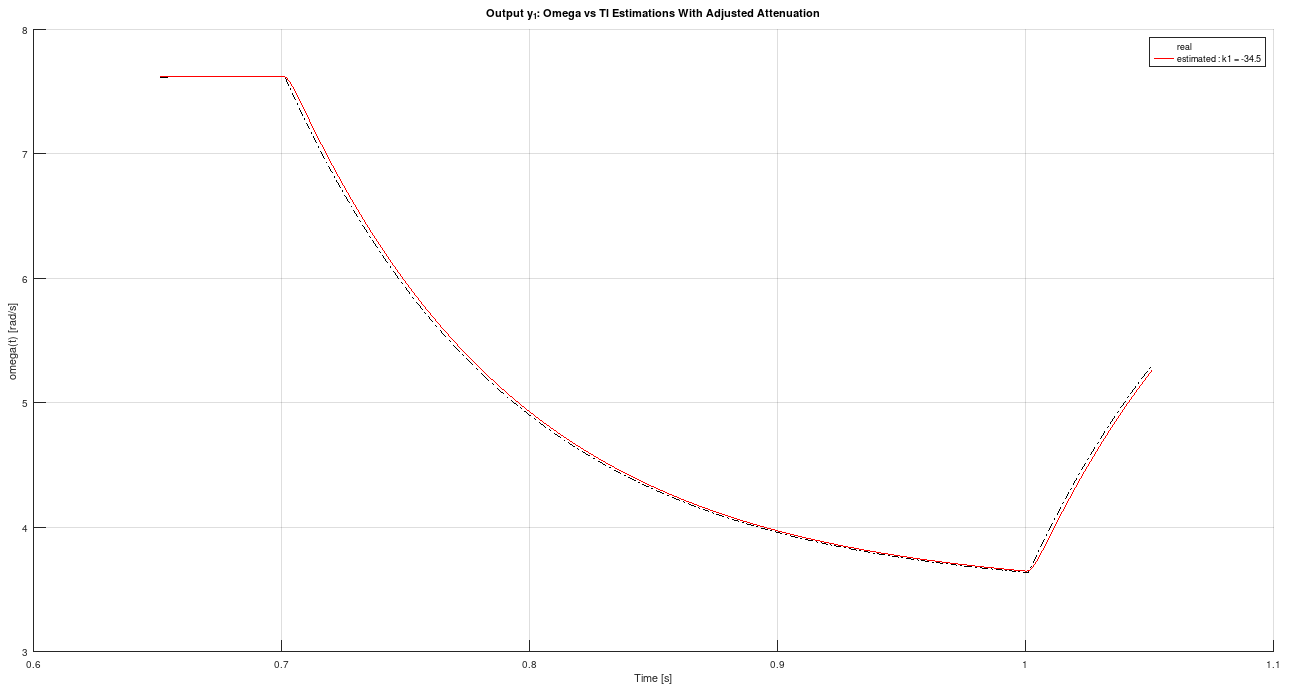

Consiguiendo modelar a la transformada de omega como k0\*Va mas k1\*TL ambas sobre la misma ecuacion caracteristica dada por los tau1 y tau2 estimados por Chen:  
Finalmente se simulo el sistema MISO utilizando lsim de Octave para comparacion:

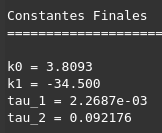

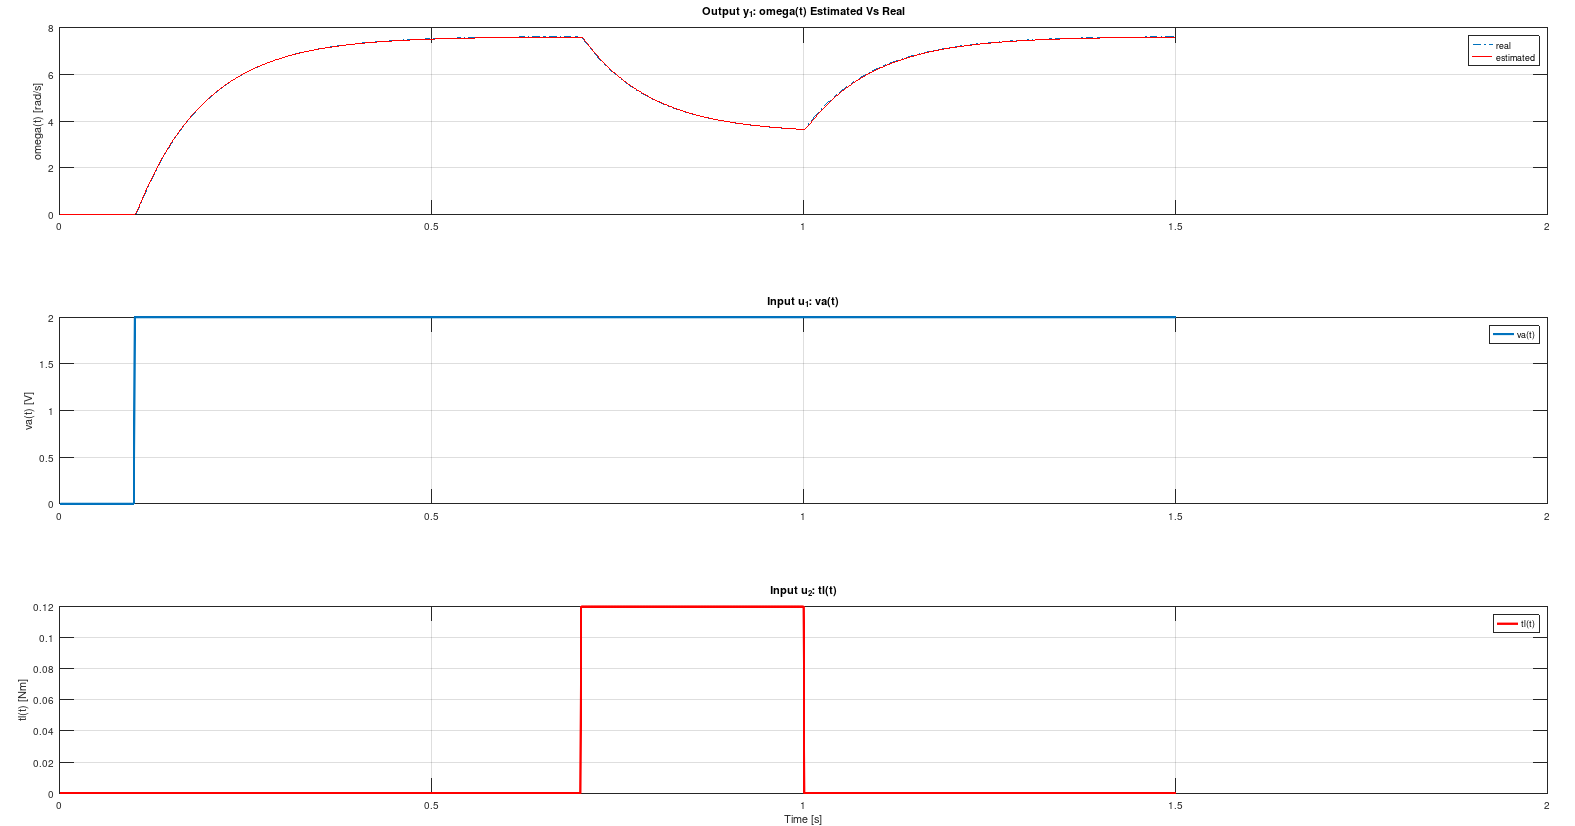

#### Item 6:

Para diseñar el PID discreto, primero se tomaron los **parametros estimados de:** https://github.com/Julianpucheta/OptimalControl/blob/main/TP_N1_Identificacion_Exacta.ipynb  
Se compararon las respuestas estimadas vs mediciones y con estos parametros se calcularon tiempo de simulacion y resolucion aceptables para las simulaciones:  

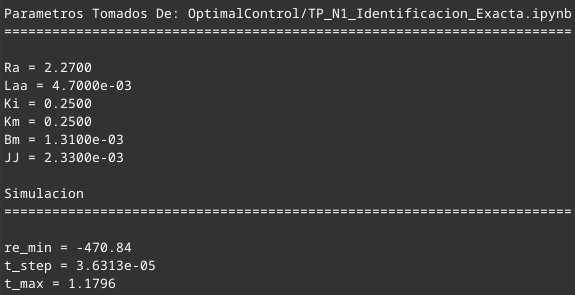

**El ajuste del PID se hizo a prueba y error**, para ello primeramente se definieron como objetivos:  

> * Que la posicion angular se estabilice en la referencia antes de aplicar el TL
> * Que la accion de control no supere los 2V del motor
> * Que al aplicar la perturbacion la salida vuelva al set-point lo mas rapido posible con una accion de control acorde

Con las especificaciones definidas y con kp = ki = kd = 1, se comenzo a variar iterativamente cada constante kp, ki y kd para visualizar los cambios en el error para cada accion de control  
En base a lo aprendido se decicio como punto de partida aumentar la accion integral para que **el error llegue a cero lo mas rapido posible:**  

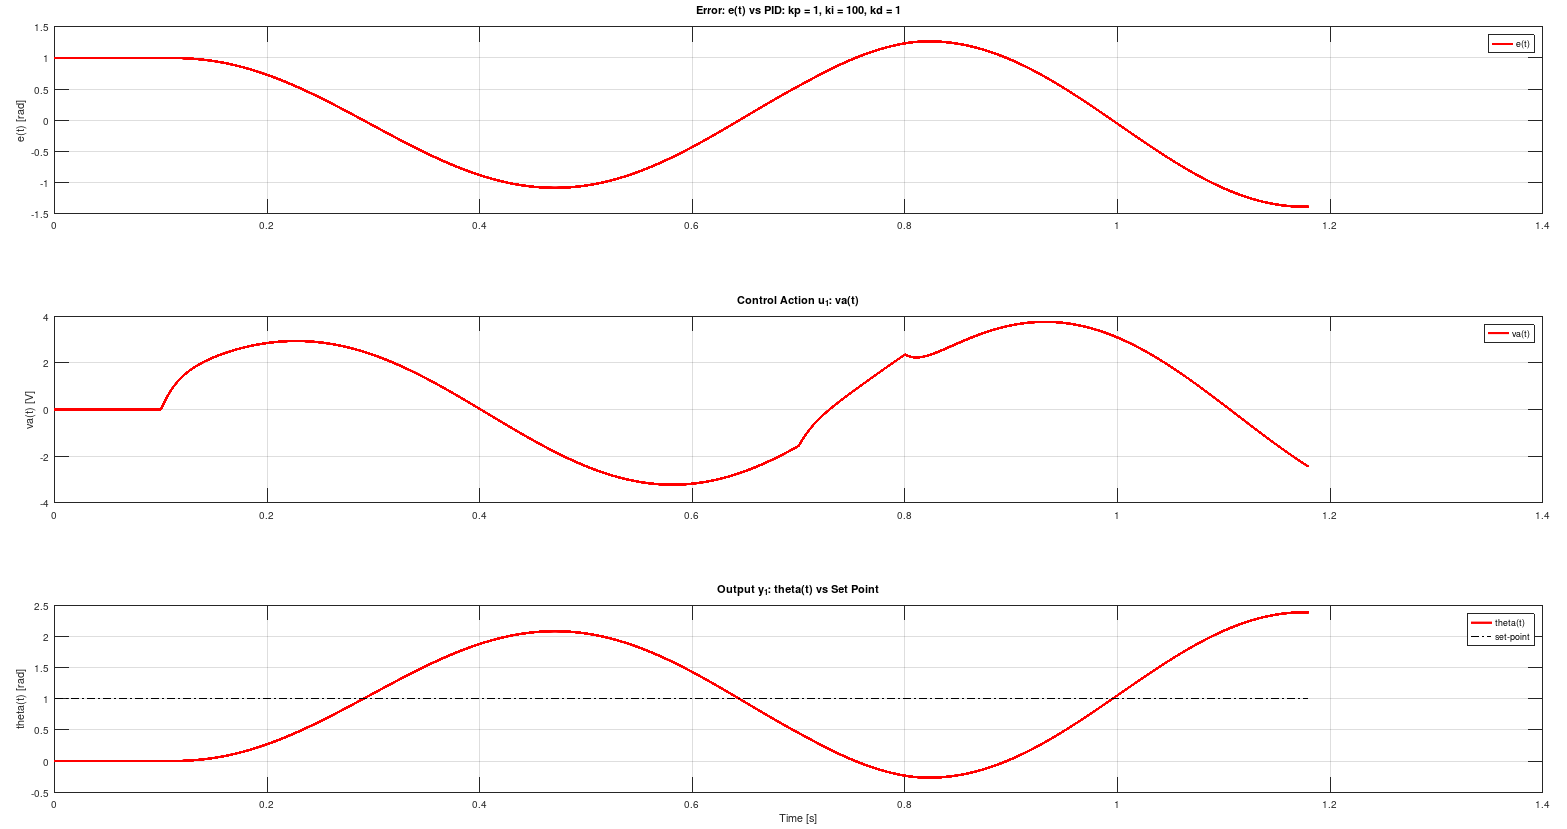

Aqui se noto que por ki el error baja rapidamente pero luego se pasa del cero exageradamente y ademas la accion de control es inadmisible  
Con esta configuracion se comenzo a incrementar la accion proporcional, logrando que el sistema si bien se hace mas lento, **no pase a error negativo tan agresivamente:**  

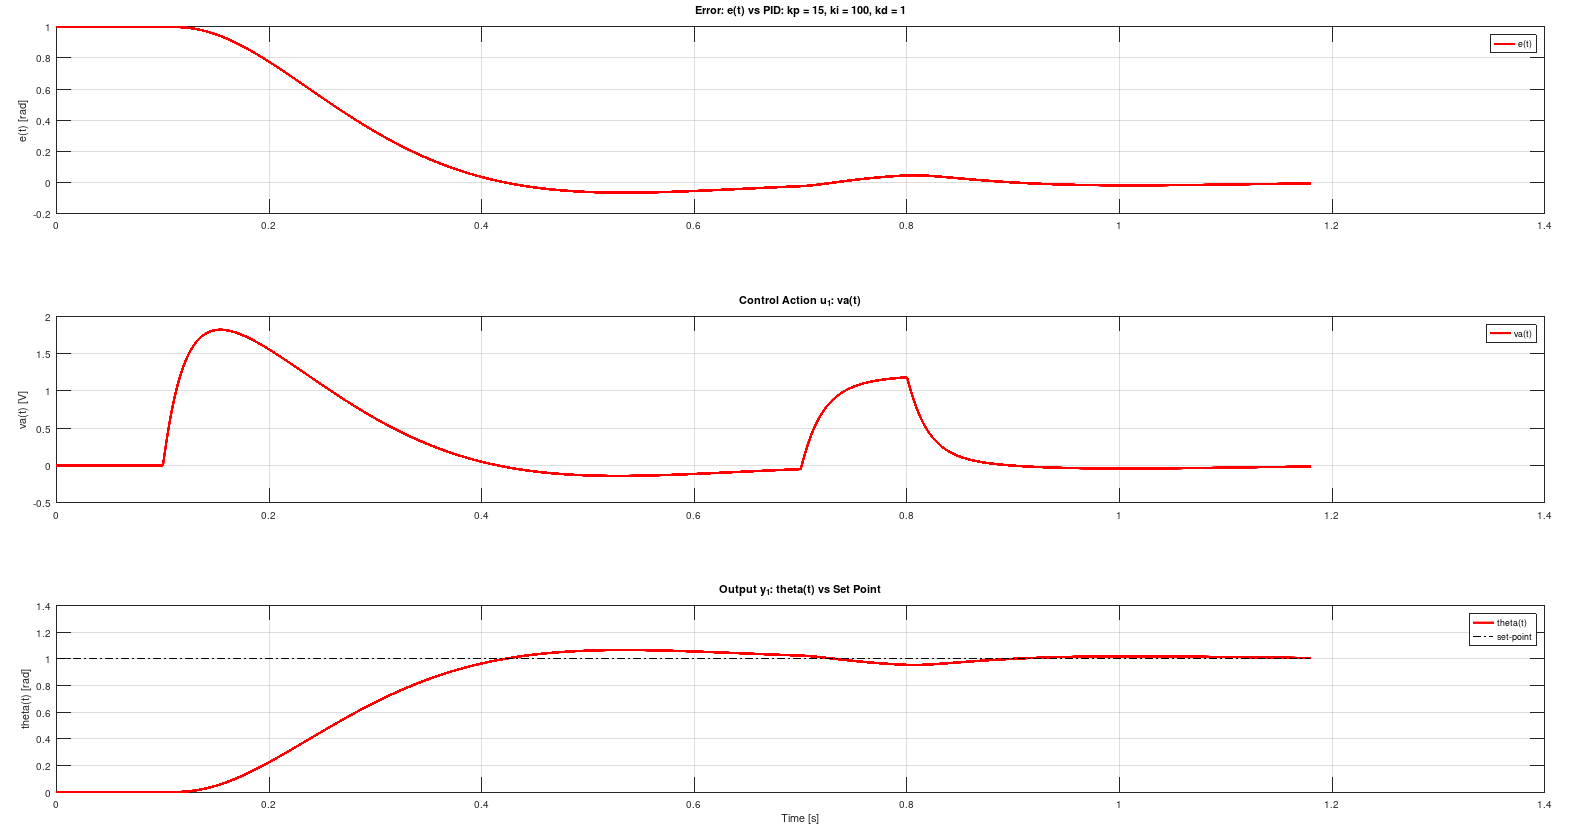

Con esto se logro mejorar el error y ademas la accion de control ahora es aceptable  
Por ultimo se intento **disminuir el sobrepasamiento de la respuesta**, para esto se disminuyo la accion derivativa y aumento la proporcional manteniendo siempre una accion de control aceptable para este motor  
Luego de varias iteraciones se obtuvo la **respuesta y configuracion del PID deseadas:**  

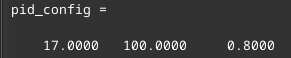

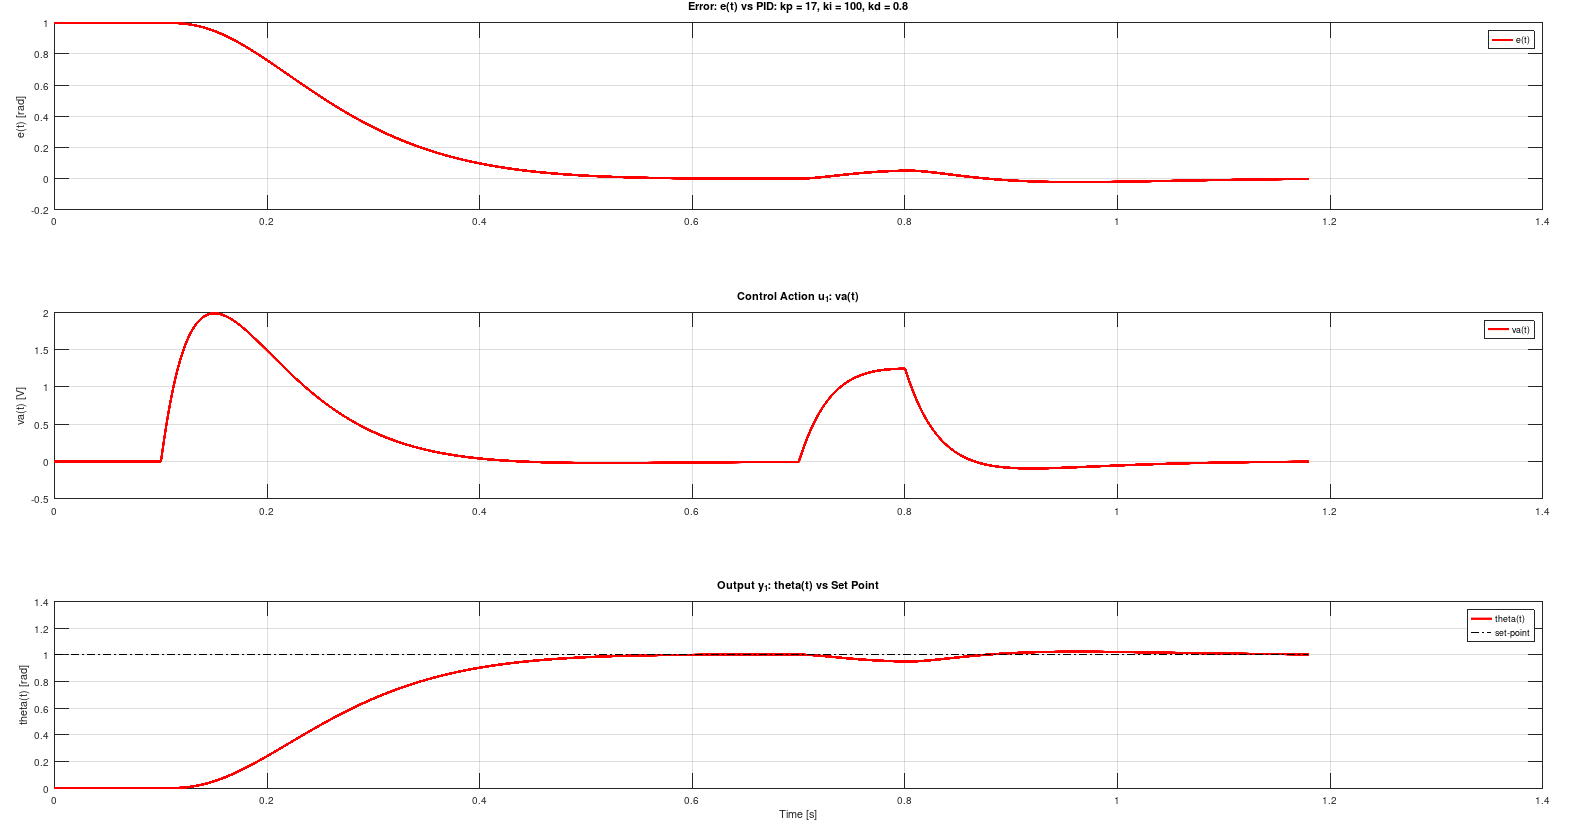

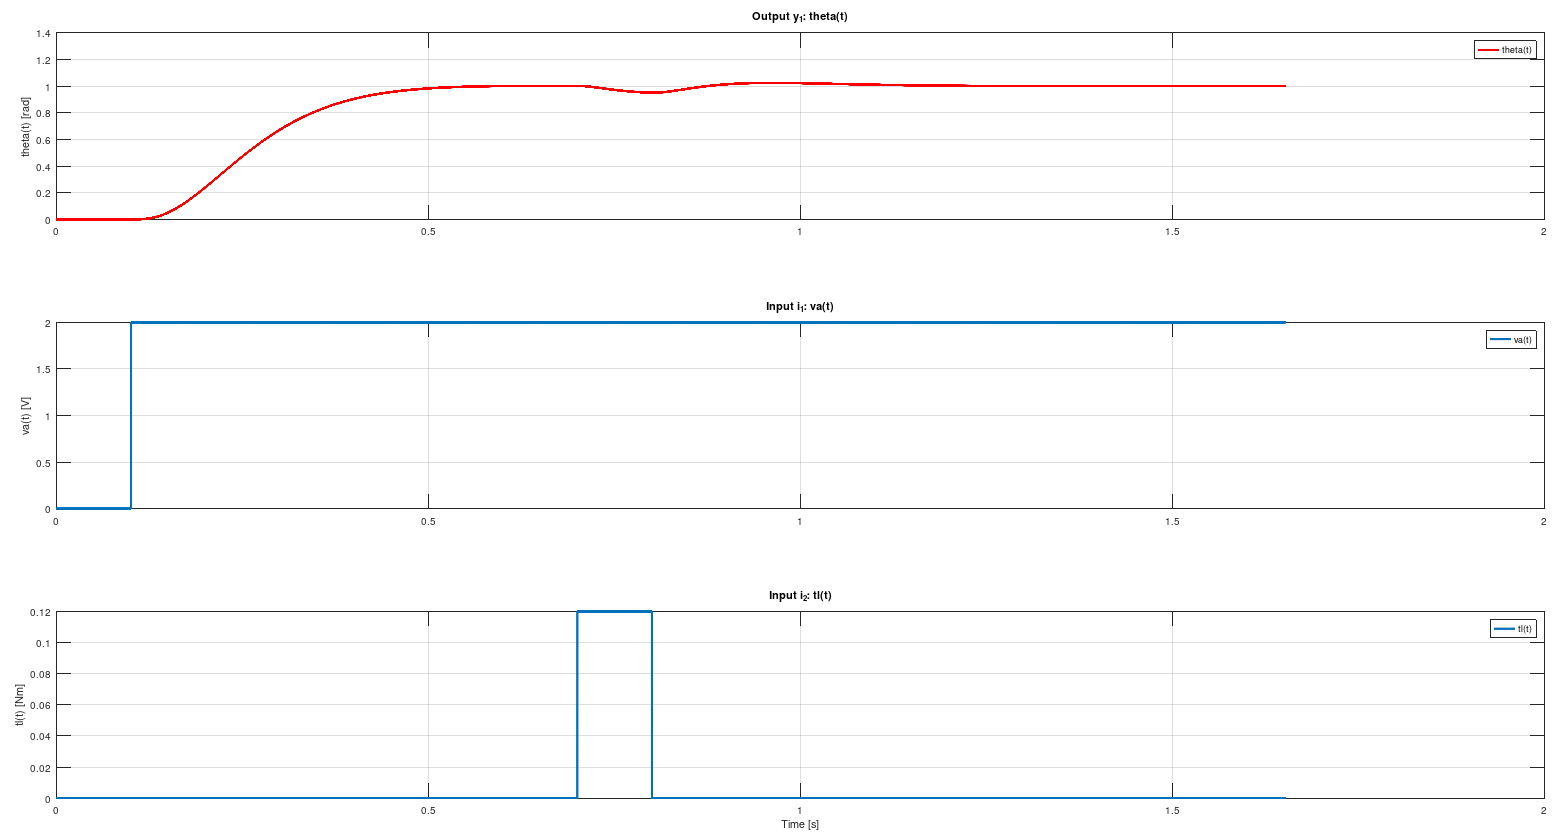

--------


#  

----------

## Fuente/herramientas

1. Apuntes/Videos De La Materia
2. Octave, Chat-GPT, vscode
3. https://github.com/Julianpucheta/OptimalControl/blob/main/TP_N1_Identificacion_Exacta.ipynb

## GitHub
1. https://github.com/Clifferto/carrerpath/tree/control2/nationalUniversity/2025/controlSystems2

----------